# Machine Learning for Car Buying at Auctions
**David Yang** 
June 29, 2017

In this notebook, to demo my expereince and knowledge in machine learning,  I conducted some primary statistical analyses of a dataset related to vehicle purchase made at auctions.  This dataset came from a Kaggle competition entitled ["Do not Get Kicked!"](https://www.kaggle.com/c/DontGetKicked)

## Analysis Goals 

The analytical task is primarily a classification problem: predicting whether a vehicle was a bad purchase (**IsBadBuy**) using features realted to the veichles and auctions as predictors.   

**GOAL A: Find a model or algorithm to make predictions as accurate as possible.**  

**GOAL B: After model selection, find a simpler model to use by the practationers at auctions.** 

As we all know, **Goal A** focus on making more accurate predictions, while **Goal B** focuses on interpretability and ease-of-use.  

As we all know that **ensemble methods** such as **Random Forest (RF)** and **Gradient Boosted Trees (GBT)** would usually optperform **single-model methods** such as a **decision tree (DT)** or **logistic regression (LR) model** when the primary target is **Goal A**. Ensemble modeling can lead to a higher chance to win the Kaggle Competition. 

But in reality, one has to make quick decision at the spot of an auction. S/he may not be allowed to bring a computer to the place. A sophistical modeling approach may be a good online machine learning option, but not one used "at the auction spot".  

Given the time limit, I choose to use **RF** as illustation of Goal A analysis, and a **LR** for Goal B analysis.

## Step 1. Data Exploration and Preprocessing

In this step, we first cheek univariate distributions for each variable in the dataset (only the training.csv data from Kaggle website was download and used here) to see if data need to be cleaned.  

Then, we conduct multivariate analysis to see if collinearity exisits between preditors or use domain knowledge to see which predictors should be excluded from consideration.   For each of the candidate predictors, we conduct bi-variable analysis to see its relationship to the outcome variable - isBadBuy.   

In [336]:
## Load all libraries to be used for Step 1
library(caTools) 
library(ggplot2)
library(plyr)
library(tidyr)

### Steo 1.1 Explore the Distribitions of All Variables 

In [337]:
data <- read.csv("/Users/xiaoweiyang/Documents/Resume/Qventus/training.csv", header = TRUE, stringsAsFactors = FALSE)


        0         1 
0.8770125 0.1229875 

         
              0     1
  ADESA   12246  2193
  MANHEIM 36328  4715
  OTHER   15433  2068


Call:
glm(formula = IsBadBuy ~ Auction, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5740  -0.5015  -0.4940  -0.4940   2.0803  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.71993    0.02319  -74.17   <2e-16 ***
AuctionMANHEIM -0.32191    0.02788  -11.55   <2e-16 ***
AuctionOTHER   -0.29000    0.03295   -8.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 54287  on 72980  degrees of freedom
AIC: 54293

Number of Fisher Scoring iterations: 4



 2001  2002  2003  2004  2005  2006  2007  2008  2009  2010 
 1481  3405  6227 10207 15489 17043 11423  6885   822     1 


    1     2     3     4     5     6     7     8     9 
 3096  8482 15902 17013 12956  8022  4646  2220   646 


Call:
glm(formula = IsBadBuy ~ VehicleAge, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9081  -0.5482  -0.4793  -0.3643   2.4562  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.253004   0.033156  -98.11   <2e-16 ***
VehicleAge   0.286700   0.006477   44.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 52444  on 72981  degrees of freedom
AIC: 52448

Number of Fisher Scoring iterations: 5



       ACURA        BUICK     CADILLAC    CHEVROLET     CHRYSLER        DODGE 
          33          720           33        17248         8844        12912 
        FORD          GMC        HONDA       HUMMER      HYUNDAI     INFINITI 
       11305          649          497            1         1811           42 
       ISUZU         JEEP          KIA        LEXUS      LINCOLN        MAZDA 
         134         1644         2484           31           97          979 
     MERCURY         MINI   MITSUBISHI       NISSAN   OLDSMOBILE     PLYMOUTH 
         913           24         1030         2085          243            2 
     PONTIAC       SATURN        SCION       SUBARU       SUZUKI       TOYOTA 
        4258         2163          129           28         1328         1144 
TOYOTA SCION   VOLKSWAGEN        VOLVO 
           1          134           37 


Call:
glm(formula = IsBadBuy ~ Make, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1774  -0.5523  -0.4668  -0.4529   2.3241  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -0.9808     0.3909  -2.509  0.01209 * 
MakeBUICK       -0.7003     0.4041  -1.733  0.08307 . 
MakeCADILLAC    -0.7419     0.6233  -1.190  0.23391   
MakeCHEVROLET   -1.2449     0.3917  -3.178  0.00148 **
MakeCHRYSLER    -0.9329     0.3922  -2.379  0.01736 * 
MakeDODGE       -1.1809     0.3919  -3.013  0.00259 **
MakeFORD        -0.7220     0.3917  -1.843  0.06530 . 
MakeGMC         -1.0543     0.4097  -2.573  0.01007 * 
MakeHONDA       -1.1238     0.4166  -2.697  0.00699 **
MakeHUMMER     -11.5852   324.7439  -0.036  0.97154   
MakeHYUNDAI     -0.9320     0.3971  -2.347  0.01892 * 
MakeINFINITI     0.2877     0.5098   0.564  0.57257   
MakeISUZU       -1.6503     0.5214  -3.165  0.00155 **
MakeJEEP        -0.7189     0


 1500 RAM PICKUP 2WD  1500 RAM PICKUP 4WD 1500 SIERRA PICKUP 2 
                1101                   57                  132 
1500 SIERRA PICKUP 4 1500 SILVERADO PICKU 1500HD SIERRA PICKUP 
                   4                  596                    1 
1500HD SILVERADO PIC  2500 RAM PICKUP 2WD  2500 RAM PICKUP 4WD 
                   8                   13                    3 
2500 SILVERADO PICKU 2500HD SIERRA PICKUP 2500HD SILVERADO PIC 
                   2                    1                   10 
              3.2 CL 3.2 CL 3.2L V 6 NA S               3.2 TL 
                   1                    3                    8 
  3.2 TL 3.2L V6 EFI 3.2 TL 3.2L V6 FI DO                  300 
                   5                    2                  237 
     300 2.7L V6 MPI  300 3.5L / 6.0L V12      300 3.5L V6 MPI 
                 174                   10                   22 
300 3.5L V6 MPI / SM                 300C     300C 5.7L V8 SFI 
                  26                   


          1   150     2   250     3   3 R   Adv   Bas     C   Car    CE   Cin 
 2360   168   305   765     3   188     7   227 13950     7     3   221     7 
  Cla   Cus    CX   CXL   CXS    DE   Den    DS   Dur    DX    eC   Edd   Edg 
  475   299   230    97     9    45     6     8     2    47     4   213   108 
   eL   Ent    ES    EX   EX-   Exe   FX4    GL   GLE   GLS    GS    GT   GTC 
    8     4   700  2120     8    19    13   410    19  1355   295   808    34 
  GTP   GTS    GX   GXE   GXP   Har   Her   Hig   Hyb     i   JLS   JLX   Kin 
   66     8     7    33     3     1    58     7     3   487     1     1    10 
    L   L 3   L10   L20   L30   Lar    LE   Lim    LL    LS    LT   LTZ   Lux 
    8     1    18   115   141   902   572   965     1 10174  3540    18    41 
  LW2   LW3    LX   LXi   Max   Maz   Nor   Out   Ove    OZ   Plu   Pre   Pro 
    8    39  2417   111    15     1   448     1     5    14    23    65    14 
  R/T   Ral   Ren    RS    RT     s     S   SC1   S


                  2D CONVERTIBLE     2D CONVERTIBLE DREAM CRUISER 
                             279                               10 
               2D CONVERTIBLE GL               2D CONVERTIBLE GLS 
                               1                                3 
               2D CONVERTIBLE GT               2D CONVERTIBLE GTC 
                               9                               34 
          2D CONVERTIBLE LIMITED                2D CONVERTIBLE LX 
                               9                               38 
              2D CONVERTIBLE LXI                2D CONVERTIBLE SE 
                               2                                3 
              2D CONVERTIBLE SLE           2D CONVERTIBLE TOURING 
                               1                               74 
                        2D COUPE                     2D COUPE 5SP 
                            1072                                2 
                   2D COUPE AUTO                  2D COUPE DX


    BEIGE     BLACK      BLUE     BROWN      GOLD     GREEN      GREY    MAROON 
     1584      7627     10347       436      5231      3194      7887      2046 
NOT AVAIL      NULL    ORANGE     OTHER    PURPLE       RED    SILVER     WHITE 
       94         8       415       242       373      6257     14875     12123 
   YELLOW 
      244 


Call:
glm(formula = IsBadBuy ~ Color, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7679  -0.5151  -0.5143  -0.4941   2.2369  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.87290    0.07394 -25.329  < 2e-16 ***
ColorBLACK     -0.19261    0.08235  -2.339  0.01933 *  
ColorBLUE      -0.16862    0.08011  -2.105  0.03531 *  
ColorBROWN     -0.04192    0.16111  -0.260  0.79469    
ColorGOLD       0.06498    0.08395   0.774  0.43886    
ColorGREEN     -0.06517    0.09118  -0.715  0.47478    
ColorGREY      -0.16279    0.08191  -1.988  0.04686 *  
ColorMAROON    -0.05416    0.09937  -0.545  0.58574    
ColorNOT AVAIL  0.80245    0.24783   3.238  0.00120 ** 
ColorNULL      -0.07301    1.07160  -0.068  0.94568    
ColorORANGE    -0.54354    0.19358  -2.808  0.00499 ** 
ColorOTHER     -0.12110    0.21129  -0.573  0.56655    
ColorPURPLE     0.13935    0.16272   0.856  0.39182    
ColorRED      


         AUTO Manual MANUAL   NULL 
     1  70398      1   2575      8 


Call:
glm(formula = IsBadBuy ~ Transmission, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5168  -0.5129  -0.5129  -0.5129   2.0754  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)          -9.566     72.463  -0.132    0.895
TransmissionAUTO      7.604     72.463   0.105    0.916
TransmissionMANUAL    7.536     72.463   0.104    0.917
TransmissionNULL      7.620     72.471   0.105    0.916

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 54420  on 72979  degrees of freedom
AIC: 54428

Number of Fisher Scoring iterations: 8


      
       Alloy Covers  NULL Special
  0        0      0     5       0
  1    36050      0     0       0
  2        0  33004     0       0
  3        0      0     0     755
  NULL     0      0  3169       0


Call:
glm(formula = IsBadBuy ~ WheelType, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5621  -0.4840  -0.4096  -0.4096   2.2451  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.08523    0.01680 -124.14   <2e-16 ***
WheelTypeCovers  -0.35109    0.02630  -13.35   <2e-16 ***
WheelTypeNULL     2.95544    0.04238   69.73   <2e-16 ***
WheelTypeSpecial  0.19419    0.10912    1.78   0.0752 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 47976  on 72979  degrees of freedom
AIC: 47984

Number of Fisher Scoring iterations: 5


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4825   61840   73360   71500   82440  115700 

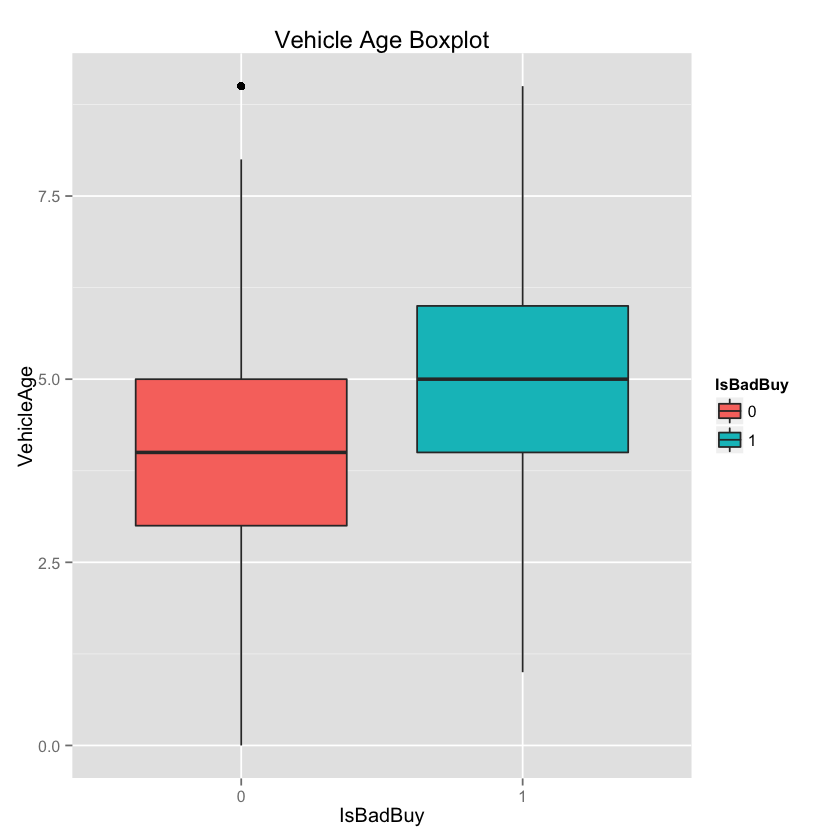


Call:
glm(formula = IsBadBuy ~ VehOdo, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7180  -0.5470  -0.5008  -0.4336   2.5468  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.291e+00  6.193e-02  -53.14   <2e-16 ***
VehOdo       1.819e-05  8.195e-07   22.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 53907  on 72981  degrees of freedom
AIC: 53911

Number of Fisher Scoring iterations: 5



      AMERICAN           NULL          OTHER    OTHER ASIAN TOP LINE ASIAN 
         61028              5            195           8033           3722 


Call:
glm(formula = IsBadBuy ~ Nationality, family = "binomial", data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-0.546  -0.508  -0.508  -0.508   2.055  

Coefficients:
                          Estimate Std. Error  z value Pr(>|z|)    
(Intercept)               -1.98259    0.01241 -159.754  < 2e-16 ***
NationalityNULL           -8.58344   53.42773   -0.161  0.87237    
NationalityOTHER           0.15446    0.20771    0.744  0.45708    
NationalityOTHER ASIAN     0.09990    0.03521    2.837  0.00455 ** 
NationalityTOP LINE ASIAN  0.12175    0.04960    2.454  0.01411 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 54407  on 72978  degrees of freedom
AIC: 54417

Number of Fisher Scoring iterations: 9



    COMPACT   CROSSOVER       LARGE   LARGE SUV LARGE TRUCK      MEDIUM 
       7205        1759        8850        1433        3170       30785 
 MEDIUM SUV        NULL   SMALL SUV SMALL TRUCK   SPECIALTY      SPORTS 
       8090           5        2276         864        1915         777 
        VAN 
       5854 


Call:
glm(formula = IsBadBuy ~ Size, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6403  -0.5221  -0.4944  -0.4404   2.1849  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.66631    0.03222 -51.710  < 2e-16 ***
SizeCROSSOVER   -0.48685    0.08448  -5.763 8.28e-09 ***
SizeLARGE       -0.61802    0.04884 -12.654  < 2e-16 ***
SizeLARGE SUV    0.02213    0.07862   0.282   0.7783    
SizeLARGE TRUCK -0.38853    0.06459  -6.015 1.80e-09 ***
SizeMEDIUM      -0.37412    0.03684 -10.154  < 2e-16 ***
SizeMEDIUM SUV  -0.08831    0.04496  -1.964   0.0495 *  
SizeNULL        -8.89972   53.42774  -0.167   0.8677    
SizeSMALL SUV   -0.16972    0.06887  -2.464   0.0137 *  
SizeSMALL TRUCK -0.11068    0.10194  -1.086   0.2776    
SizeSPECIALTY   -0.62428    0.08541  -7.309 2.69e-13 ***
SizeSPORTS       0.18565    0.09779   1.898   0.0576 .  
SizeVAN         -0.25753    0.05074  -5.075 3.87e-07 ***
-


CHRYSLER     FORD       GM     NULL    OTHER 
   23399    12315    25314        5    11950 


Call:
glm(formula = IsBadBuy ~ TopThreeAmericanName, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5832  -0.5342  -0.4976  -0.4783   2.1094  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -2.02641    0.02038 -99.431  < 2e-16 ***
TopThreeAmericanNameFORD   0.34111    0.03211  10.624  < 2e-16 ***
TopThreeAmericanNameGM    -0.08407    0.02873  -2.927  0.00343 ** 
TopThreeAmericanNameNULL  -8.53962   53.42774  -0.160  0.87301    
TopThreeAmericanNameOTHER  0.15146    0.03378   4.484 7.34e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 54227  on 72978  degrees of freedom
AIC: 54237

Number of Fisher Scoring iterations: 9


Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”

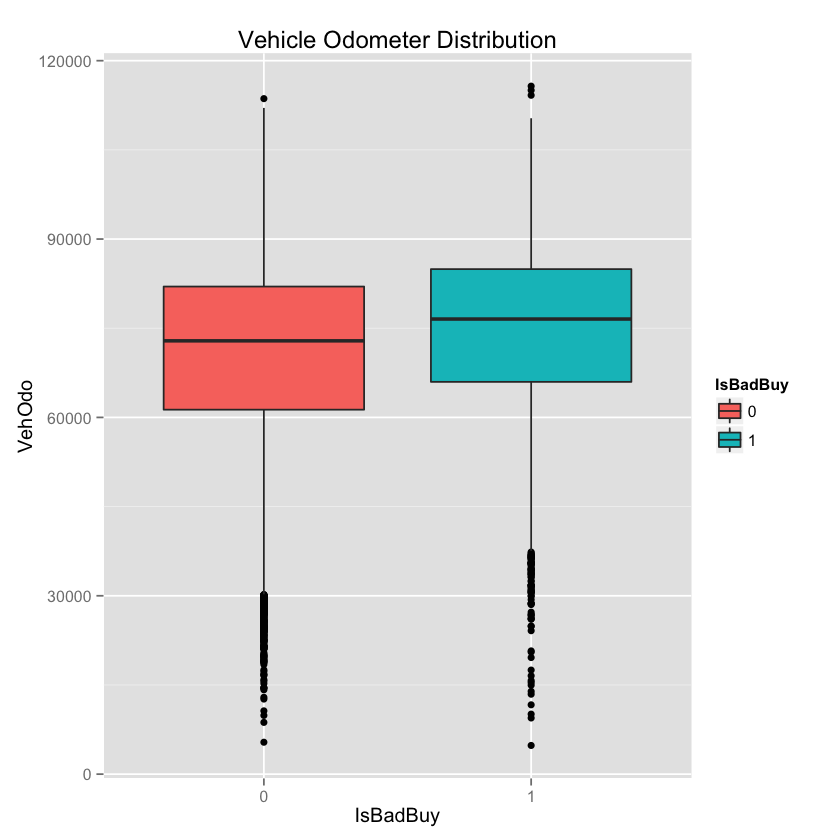


Call:
glm(formula = IsBadBuy ~ ., family = "binomial", data = cbind(data[, 
    c(l:r, dv)]))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9116  -0.5626  -0.4796  -0.3947   3.9069  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -1.327e+00  4.114e-02 -32.255  < 2e-16 ***
MMRAcquisitionAuctionAveragePrice -6.164e-04  7.173e-05  -8.593  < 2e-16 ***
MMRAcquisitionAuctionCleanPrice    2.710e-04  6.297e-05   4.304 1.67e-05 ***
MMRAcquisitionRetailAveragePrice   2.001e-04  4.470e-05   4.476 7.59e-06 ***
MMRAcquisitonRetailCleanPrice      6.381e-06  4.134e-05   0.154    0.877    
MMRCurrentAuctionAveragePrice      4.255e-05  7.095e-05   0.600    0.549    
MMRCurrentAuctionCleanPrice        9.110e-05  6.280e-05   1.451    0.147    
MMRCurrentRetailAveragePrice      -1.858e-04  4.523e-05  -4.106 4.02e-05 ***
MMRCurrentRetailCleanPrice         7.346e-07  4.154e-05   0.018    0.986    
---
Si


   NO  NULL   YES 
 3357 69564    62 


GREEN  NULL   RED 
 3340 69564    79 


Call:
glm(formula = IsBadBuy ~ AUCGUART, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5214  -0.5214  -0.5214  -0.5214   2.5634  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.24727    0.09113 -35.634  < 2e-16 ***
AUCGUARTNULL  1.32061    0.09184  14.380  < 2e-16 ***
AUCGUARTRED   1.06403    0.38391   2.772  0.00558 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 54109  on 72980  degrees of freedom
AIC: 54115

Number of Fisher Scoring iterations: 5


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    835   17210   19660   26350   22810   99760 


 2764  3106  8505 12552 16066 16137 17028 17406 17545 19440 20166 21014 21075 
   15    97   317     6     6     2    33   139   136   531   569   183   975 
22403 22801 23234 23606 25071 25177 26431 27407 27542 28273 28625 29070 29323 
  522   533     5    33     1   155   136   574  3402  1887  1179   265     3 
29461 29532 29697 30120 30212 30272 30315 30331 30529 32124 32219 32225 32503 
  338  1675  1999   154   595  1163   129   406     3  1162   694     5    34 
32750 32772 32812 32824 33073 33311 33314 33411 33619 33762 33809 33916 34203 
  267    85    73  3699   107   136   185   273  1739   176   672    34   204 
34761 35004 35613 37122 37138 37210 37421 37771 38118 38128 38637 39208 39402 
  902   478   212   266    18   537   248   411   269    15   224   136   133 
42104 43207 45005 45011 46239 46803 47129 48265 50111 55369 60440 60443 60445 
  230    12   758    25   122   130   234    14   499    62   175   117   118 
62207 63044 64153 64161 68138 70002 70401 70460 711


   AL    AR    AZ    CA    CO    FL    GA    IA    ID    IL    IN    KY    LA 
  690    70  6174  7095  4998 10447  2450   499   196   458   486   230   349 
   MA    MD    MI    MN    MO    MS    NC    NE    NH    NJ    NM    NV    NY 
   15  1158    14    62   758   493  7042    26    97   317   239   562     6 
   OH    OK    OR    PA    SC    TN    TX    UT    VA    WA    WV 
  795  3594   211   847  4280  1764 13596   875  1662   136   292 


Call:
glm(formula = IsBadBuy ~ VNST, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7204  -0.5451  -0.4921  -0.4812   2.6207  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.92292    0.11413 -16.849  < 2e-16 ***
VNSTAR       0.70653    0.30666   2.304  0.02123 *  
VNSTAZ      -0.12733    0.12095  -1.053  0.29242    
VNSTCA       0.05720    0.11933   0.479  0.63167    
VNSTCO      -0.06150    0.12210  -0.504  0.61447    
VNSTFL      -0.17485    0.11835  -1.477  0.13959    
VNSTGA      -0.15331    0.13095  -1.171  0.24169    
VNSTIA       0.15894    0.17050   0.932  0.35124    
VNSTID      -0.30879    0.26703  -1.156  0.24753    
VNSTIL       0.15891    0.17466   0.910  0.36294    
VNSTIN       0.10695    0.17356   0.616  0.53776    
VNSTKY      -0.73967    0.29042  -2.547  0.01087 *  
VNSTLA       0.18043    0.18874   0.956  0.33908    
VNSTMA       0.05112    0.76808   0.067  0.94694    
VNST

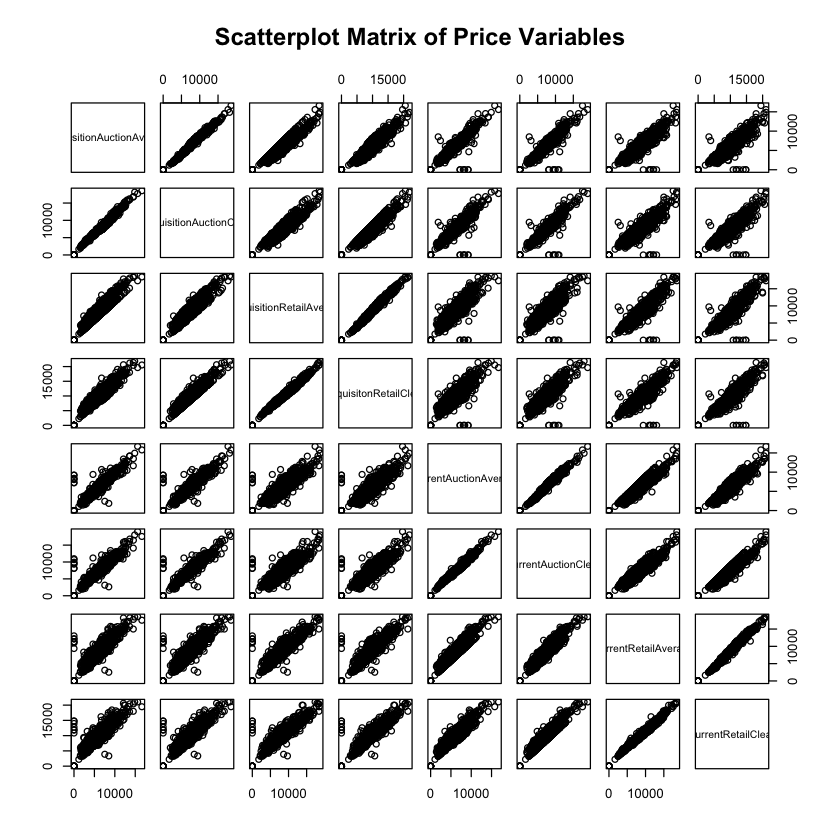


Call:
glm(formula = IsBadBuy ~ VehBCost, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7831  -0.5497  -0.4841  -0.4300   4.2676  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.682e-01  4.434e-02  -17.33   <2e-16 ***
VehBCost    -1.834e-04  6.779e-06  -27.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 53660  on 72981  degrees of freedom
AIC: 53664

Number of Fisher Scoring iterations: 5


   
        0     1
  0 62375  8763
  1  1632   213

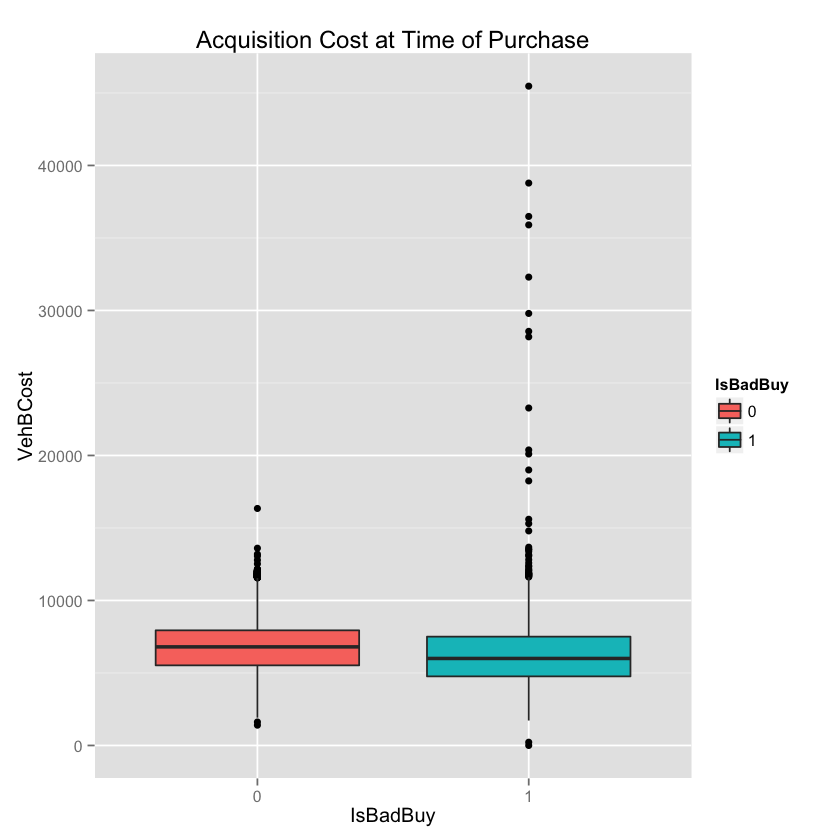


Call:
glm(formula = IsBadBuy ~ WarrantyCost, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9775  -0.5235  -0.4996  -0.4797   2.1330  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.276e+00  2.542e-02  -89.55   <2e-16 ***
WarrantyCost  2.382e-04  1.695e-05   14.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 54236  on 72981  degrees of freedom
AIC: 54240

Number of Fisher Scoring iterations: 4


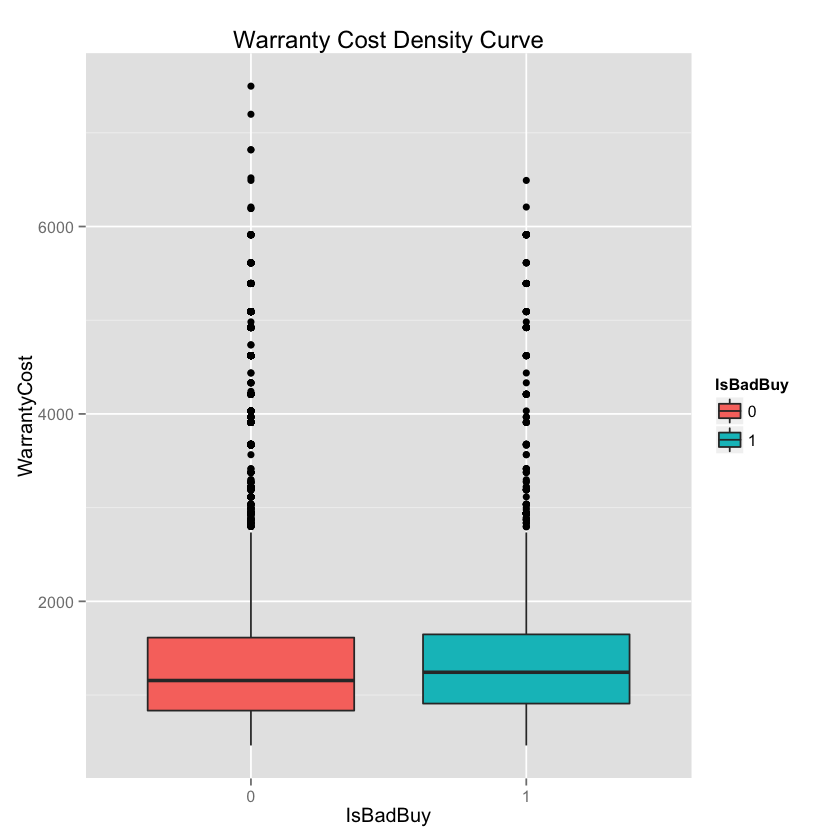

In [338]:
## dIsBadBuy: outcome variable  
## We see that 12% of the purchases were bad buy. May consider down sampling strategy to sub-sample the negative group (IsBadPurchase=No)  
prop.table(table(data$IsBadBuy))  
data$IsBadBuy <- as.factor(data$IsBadBuy)

## Auction providers:  we may need to explore this variable further in the future
## This is a strong predictor of IsBadPurchase
table(data$Auction, data$IsBadBuy)
data$Auction <- as.factor(data$Auction)
summary(glm(IsBadBuy ~ Auction, data = data, family = "binomial"))

## Vehicle Year
## This variable is redundent with Vehicle Age (VehicleAge), thus can be excluded from analysis. 
table(data$VehYear)
data$VehYear <- NULL

## Vehicle Age (is zero meaningful as age? maybe a new car)  
## May be an important predictor 
ggplot(aes(y = VehicleAge, x = IsBadBuy, fill = IsBadBuy), data = data) + geom_boxplot() + ggtitle("Vehicle Age Boxplot")
data[data$VehicleAge==0,]$VehicleAge <- 1
table(data$VehicleAge)
summary(glm(IsBadBuy ~ VehicleAge, data = data, family = "binomial"))

## Make of the Vehicles 
table(data$Make)
data[data$Make == "TOYOTA SCION",]$Make <- "TOYOTA"
data$Make <- as.factor(data$Make)
## This is potentially a useful predictor
summary(glm(IsBadBuy ~ Make, data = data, family = "binomial"))  

## Model, SubModel, and Trim all have many categories.  
table(data$Model)
table(data$Trim)
table(data$SubModel)

## color 
table(data$Color)
data$Color <- as.factor(data$Color)
summary(glm(IsBadBuy ~ Color, data = data, family = "binomial"))  

## Transmission  
table(data$Transmission)
data[data$Transmission == "Manual",]$Transmission <- "MANUAL"  #Combine Manual with MANUAL
data$Transmission <- as.factor(data$Transmission)
## Not an indivial predictor; but will still consider it since it is an important feature
summary(glm(IsBadBuy ~ Transmission, data = data, family = "binomial"))   

## Wheel Type 
table(data$WheelTypeID, data$WheelType)
data$WheelTypeID <- NULL   #We can remove WheelTypeID 
## May be a useful predictor
summary(glm(IsBadBuy ~ WheelType, data = data, family = "binomial"))   

## Odometer Reading [To Verfiy: (1) in Miles or Km? (2) Do they all use same unit]
summary(data$VehOdo)
ggplot(data, aes(y=VehOdo, x=IsBadBuy, fill=IsBadBuy)) + geom_boxplot() + ggtitle("Vehicle Odometer Distribution")
## A strong predictor:  Higher Milage, Higher Probability to be a Bad Buy 
summary(glm(IsBadBuy ~ VehOdo, data = data, family = "binomial"))   

## The Manufacturer's country
table(data$Nationality)
## Potentially useful, but could be correlated with other features such as mileage, age, etc. 
summary(glm(IsBadBuy ~ Nationality, data = data, family = "binomial"))   

## The size category of the vehicle (Compact, SUV, etc.)
table(data$Size)
summary(glm(IsBadBuy ~ Size, data = data, family = "binomial"))   

## Identifies if the manufacturer is one of the top three American manufacturers
table(data$TopThreeAmericanName)
summary(glm(IsBadBuy ~ TopThreeAmericanName, data = data, family = "binomial"))   

## Scatterplot Matrix of the Price Variables 
## Most of these price variables are correlated!!!
l = grep("MMRAcquisitionAuctionAveragePrice", colnames(data))
r = grep("MMRCurrentRetailCleanPrice", colnames(data))
data[, l:r] = apply(data[, l:r], 2, function(x) as.numeric(as.character(x)))
pairs(data[sample(nrow(data), 1000), l:r], main="Scatterplot Matrix of Price Variables")
    
## Preliminary exploration of Price variables in predicting IsBadBuy
dv = grep("IsBadBuy", colnames(data))
summary(glm(IsBadBuy ~ . , data = cbind(data[, c(l:r, dv)]), family = "binomial"))   
    
## Identifies if the vehicle would have a higher demand than a standard purchase
## This variable has little contribution; can be removed 
table(data$PRIMEUNIT)
data$PRIMEUNIT <- NULL
    
## The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
table(data$AUCGUART)
summary(glm(IsBadBuy ~ AUCGUART , data = data, family = "binomial"))  

## Unique number assigned to the buyer that purchased the vehicle
## Could be removed
summary(data$BYRNO)
data$BYRNO <- NULL
    
## Zipcode where the car was purchased
## We ignore this variable in this analysis
table(data$VNZIP1)
data$VNZIP1 <- NULL
    
## State where the the car was purchased
## NY only has 6. The data mainly reflect western sates. 
table(data$VNST)
summary(glm(IsBadBuy ~ VNST , data = data, family = "binomial"))  
    
## Acquisition cost paid for the vehicle at time of purchase
## Slightly skewed; had a tail on the right.
ggplot(data, aes(y=VehBCost, x=IsBadBuy, fill=IsBadBuy)) + geom_boxplot() + ggtitle("Acquisition Cost at Time of Purchase")
summary(glm(IsBadBuy ~ VehBCost , data = data, family = "binomial"))  
    
## Identifies if the vehicle was originally purchased online
## only 2.5% from online
table(data$IsOnlineSale, data$IsBadBuy)
data$IsOnlineSale <- NULL
    
## Warranty price (term=36month  and millage=36K) 
## May consider log() transform 
ggplot(data, aes(y=WarrantyCost, x=IsBadBuy, fill=IsBadBuy)) + geom_boxplot() + ggtitle("Warranty Cost Density Curve")
summary(glm(IsBadBuy ~ WarrantyCost , data = data, family = "binomial"))  

###  Step 1.2 Feature Engineering 

The majority of effort is often spent on feature engineering.  This involes transforming the variables, deriving new variables, e.g., polynimials, interaction terms, dummy variables, etc.  Here I only give several examples. 

In [339]:
### This is an example to see how to construct features from seemlingly messy text fields. 

## Engine Size can be derived from the two variables, Model and SubModel.  

digit1 <- c("1","2","3","4","5","6","7","8")
digit2 <- c("0","1","2","3","4","5","6","7","8","9")
data$Engine <- "NULL"
for (i in digit1){
  for (j in digit2){
    data$Engine[grep(paste0(i, ".", j, "L"),data$Model)] <- paste0(i, ".", j, "L")
    data$Engine[grep(paste0(i, ".", j, "L"),data$SubModel)] <- paste0(i, ".", j, "L") }}
data$Engine <- as.factor(data$Engine)
## This is marginal predictive, thus I will not use it in this take-home project
summary(glm(IsBadBuy ~ Engine, data = data, family = "binomial"))  


### From the SubModel variable, we can see the Body Type, which is an actionable predictor is it is predictive. 

## Body of the car
BodyType <- c("WAGON","PICKUP","MINIVAN","COUPE","SEDAN")
len<-length(colnames(data))
for (i in 1:5){
  data[, len + i] <- 0
  data[, len + i][grep(BodyType[i], data$SubModel)] <- 1 }

colnames(data)[(len+1):(len+5)] <- c("WAGON","PICKUP","MINIVAN","COUPE","SEDAN")

## These dummy variables are useful predictor: e.g., COUPE has a higher chance to be Bad Buy.
summary(glm(IsBadBuy ~ WAGON + PICKUP + MINIVAN + COUPE + SEDAN, data = data, family = "binomial"))  

## Now, I can remove these variables
data$Model <- data$Trim <- data$SubModel <- NULL


### Date features are usually transformed into Year, Month, Day, and sometimes Weekday. But I do not see a need of Weekday in this project

## Convert Purchase Date to "Month", "Day", and "Year"; each as new columns
data$PurchDate <- as.character(data$PurchDate)
data <- separate(data, col=PurchDate, into=c("Month", "Day", "Year"), sep="/")
data$Month <- as.factor(data$Month)
data$Day <- as.factor(data$Day)
data$Year <- as.factor(data$Year)
## All these three variables are potential predictors of IsBadBuy
summary(glm(IsBadBuy ~ Day + Month + Year, data = data, family = "binomial"))


Call:
glm(formula = IsBadBuy ~ Engine, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1774  -0.5273  -0.5273  -0.4575   2.3548  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.25129    0.52566  -4.283 1.85e-05 ***
Engine1.6L    0.56005    0.54381   1.030   0.3031    
Engine1.7L  -10.31477  102.69432  -0.100   0.9200    
Engine1.8L    0.28084    0.57084   0.492   0.6227    
Engine1.9L    0.82418    0.61616   1.338   0.1810    
Engine2.0L    0.38395    0.52867   0.726   0.4677    
Engine2.2L    0.04680    0.52895   0.088   0.9295    
Engine2.3L    0.18045    0.54013   0.334   0.7383    
Engine2.4L    0.22154    0.52800   0.420   0.6748    
Engine2.5L    0.54453    0.55006   0.990   0.3222    
Engine2.7L   -0.37425    0.53180  -0.704   0.4816    
Engine2.8L   -0.33540    0.65569  -0.512   0.6090    
Engine2.9L  -10.31477  132.57710  -0.078   0.9380    
Engine3.0L    0.45037    0.52792   0.853 


Call:
glm(formula = IsBadBuy ~ WAGON + PICKUP + MINIVAN + COUPE + SEDAN, 
    family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5974  -0.5351  -0.4958  -0.4958   2.1649  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.87132    0.02054 -91.105  < 2e-16 ***
WAGON       -0.12667    0.05203  -2.435   0.0149 *  
PICKUP      -0.37116    0.30427  -1.220   0.2225    
MINIVAN     -0.07459    0.05653  -1.319   0.1870    
COUPE        0.23831    0.05625   4.237 2.26e-05 ***
SEDAN       -0.16288    0.02556  -6.372 1.87e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54421  on 72982  degrees of freedom
Residual deviance: 54341  on 72977  degrees of freedom
AIC: 54353

Number of Fisher Scoring iterations: 4



Call:
glm(formula = IsBadBuy ~ Day + Month + Year, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6079  -0.5354  -0.5056  -0.4667   2.2797  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.864558   0.082252 -22.669  < 2e-16 ***
Day10       -0.029723   0.089869  -0.331 0.740847    
Day11       -0.049813   0.091276  -0.546 0.585247    
Day12       -0.183120   0.094571  -1.936 0.052829 .  
Day13       -0.153922   0.092955  -1.656 0.097746 .  
Day14       -0.089004   0.090562  -0.983 0.325708    
Day15       -0.063358   0.089794  -0.706 0.480443    
Day16       -0.163603   0.088585  -1.847 0.064768 .  
Day17       -0.164137   0.090223  -1.819 0.068877 .  
Day18       -0.221998   0.089562  -2.479 0.013186 *  
Day19        0.043888   0.092079   0.477 0.633623    
Day2        -0.006086   0.089188  -0.068 0.945598    
Day20       -0.209545   0.093156  -2.249 0.024488 *  
Day21       -0.276314   

**Dealing with Price Variables**

When some numerical variables are related to each other and other categorical features, it is better that we spend time first to understand their realtionship before conducting any individual transformations. 

For example, the price variables can be normaled by diving them by vehicle age or odometer readings. We may also need to derive other type of ratios using Acuisation Cost as baseline.  

In [340]:
## Derive Price Ratios (Clean over Average) 
data$AcqAucCle2AcqAucAve <- data$MMRAcquisitionAuctionCleanPrice / data$MMRAcquisitionAuctionAveragePrice
data$AcqRetCle2AcqRetAve <- data$MMRAcquisitonRetailCleanPrice / data$MMRAcquisitionRetailAveragePrice
data$CurAucCle2CurAucAve <- data$MMRCurrentAuctionCleanPrice / data$MMRCurrentAuctionAveragePrice
data$CurRetCle2CurRetAve <- data$MMRCurrentRetailCleanPrice / data$MMRCurrentRetailAveragePrice

## Normalize the Price Ratios by Age of the Vechicle
data$AcqAucCle2AcqAucAve2Age <- data$AcqAucCle2AcqAucAve / data$VehicleAge
data$AcqRetCle2AcqRetAve2Age <- data$AcqRetCle2AcqRetAve / data$VehicleAge
data$CurAucCle2CurAucAve2Age <- data$CurAucCle2CurAucAve / data$VehicleAge
data$CurRetCle2CurRetAve2Age <- data$CurRetCle2CurRetAve / data$VehicleAge

## Normalize the Odometer Reading and Acquasition Cost by Age 
data$Odo2Age <- data$VehOdo / data$VehicleAge
data$AcqCos2Age <- data$VehBCost / data$VehicleAge

## Normalize the Acquasition Cost by WarrantyCost
data$Cos2War <- data$VehBCost / data$WarrantyCost

In [341]:
## Final Cleaning Jobs 

var <- c('WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'WAGON', 'PICKUP', 'MINIVAN', 'COUPE', 'SEDAN')
for (i in var) { data[,i] <- as.factor(data[,i])}

var_to_delete <- c('Make', 'VNST', 'RefId', 'Model', 'Trim', 'SubModel', 'VehOdo', 'Engine', 'Size',
                   'WAGON.1', 'PICKUP.1', 'MINIVAN.1', 'COUPE.1', 'SEDAN.1', 'AUCGUART',
                   'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 
                   'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 
                   'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 
                   'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
                   'AcqAucCle2AcqAucAve', 'AcqRetCle2AcqRetAve', 'CurAucCle2CurAucAve', 'CurRetCle2CurRetAve')

for (i in var_to_delete) { data[, i] <- NULL} 

## Step 2.  Fit a Logistic Regression (LR) Model as Baseline

Let us first fit a most popularly used model, Logistic Regression (LR), which can be viewed as a baseline model. It can be tentatively used for Goal B purposes, before we have time to find a better model such as Decision Tree.  

In [343]:
library(rpart)
library(gbm)
library(ROCR)
library(randomForest)

### Step 2.1 Split Dataset into Training and Testing Sets

In [344]:
## Remove Records with Missing Values in this project
final_data <- data[complete.cases(data),]

## Split the clean data into Train and Test parts 
set.seed(123)
train_sampls <- sample(1:nrow(final_data), 0.7*nrow(final_data))
train_data <- final_data[train_sampls,]
test_data <- final_data[-train_sampls,]

When the target variable is unbalanced, a naive model is to simply assume that all cases belong to one group.  In this study, we can assume all purchases are good buys.  The accuracy in this case is 87.8%. 

Obviously, this is not the smart solution, but from here we see that accuracy is not always a good crtiterion to use in classification tasks. 

In [347]:
## A naive model is to assume that all purchases are good buy.
prop.table(table(train_data$IsBadBuy))


        0         1 
0.8780269 0.1219731 

### Step 2.2 Fit the Logistic Regression Model 

After adopting a procedure of variable selection, with the given set of features, we find our first model, which is a simple one. This model makes a lot of sense.  For example, older car (VehicleAge) has higher chance to be a "bad buy", cars with higher acquasation cost (VehBCost) assocaite with smaller risk of being a "bad buy". 

This simple model assocaite with a ROC curve with area under it of 74.5%.  Using 50% as cutoff level, the confusion matrix 
<pre>
```
                Good   Bad

  Predicted  0 18558  2029

  Predicted  1   287   666
``` 
</pre>
Suggests that the False Negative Rate is low, only 1.5% (287/(287+18558)).  However, the False Postive Rate (FPR) is very high 75% (2029/(2029+666)).  We may consider using lower cutoff in lower FPR. 

Note: Here we treat Bad Buy as "+" event. 


Call:
glm(formula = IsBadBuy ~ VehicleAge + VehBCost + WarrantyCost + 
    AcqCos2Age + WheelType + TopThreeAmericanName + AcqRetCle2AcqRetAve2Age + 
    WAGON, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3132  -0.4773  -0.3910  -0.3146   2.8839  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.385e+00  2.200e-01  -6.295 3.07e-10 ***
VehicleAge                 1.612e-01  1.749e-02   9.213  < 2e-16 ***
VehBCost                  -1.946e-04  1.724e-05 -11.291  < 2e-16 ***
WarrantyCost               1.514e-04  2.696e-05   5.618 1.93e-08 ***
AcqCos2Age                 3.662e-04  5.306e-05   6.902 5.14e-12 ***
WheelTypeCovers           -1.390e-01  3.500e-02  -3.971 7.15e-05 ***
WheelTypeNULL              3.175e+00  5.480e-02  57.931  < 2e-16 ***
WheelTypeSpecial           2.063e-01  1.333e-01   1.548   0.1217    
TopThreeAmericanNameFORD   7.469e-02  4.457e-02 

   
        0     1
  0 18558  2029
  1   287   666

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7450806


Slot "alpha.values":
list()


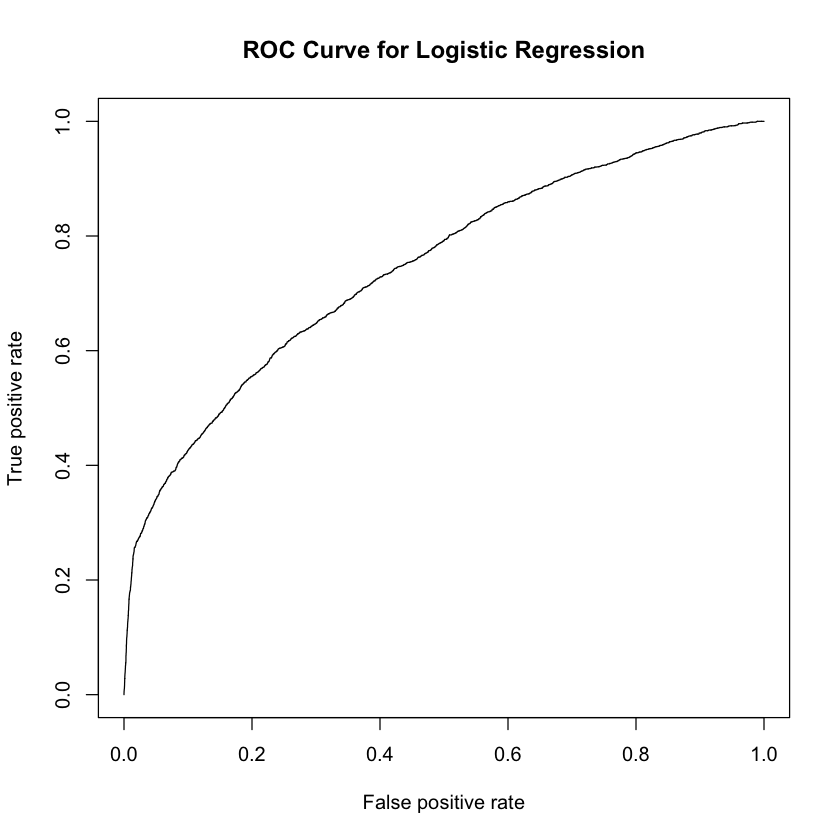

In [356]:
## Apply a backward elimination variable selection procedure, I ended up with the following model 
logit <- glm(IsBadBuy ~ VehicleAge 
                      + VehBCost 
                      + WarrantyCost
                      + AcqCos2Age 
                      + WheelType
                      + TopThreeAmericanName
                      + AcqRetCle2AcqRetAve2Age 
                      + WAGON,
            data = train_data, family = "binomial")
summary(logit)

## ROC Curve 
## The model has AUC = 74.6%
prob <- predict(logit, newdata = test_data, type = "response")
table(ifelse(prob > 0.5,1,0), test_data$IsBadBuy)
plot(performance(prediction(prob, test_data$IsBadBuy), 'tpr', 'fpr'), main="ROC Curve for Logistic Regression")
auc <- performance(prediction(prob, test_data$IsBadBuy),"auc")
auc

## Step 3.  Ensemble Methods for Goal A

Random Forest is an out-of-box choice for ensemble solution in supervisor learning.  Compared to other methods (e.g., GBT, SVM, and ANN), RF requires minimal efforts in model tunning and feature engineering, although other methods may end up a better performance after making enough effort on model training and selection.  
   
Almost instantly, we fitted our first RF.  Its ROC curve with area under it is 74.5%, which is around the same as that of the LR model.  The confusion matrix given by the FT 
<pre>
```
                Good   Bad

  Predicted  0 18644  2021

  Predicted  1   201   674
``` 
</pre>
Suggests that the False Negative Rate is only 1.1% (201/(201+18644)), even lower than that of the LR result.  The False Postive Rate (FPR) is still as high as 75% (2021/(674+2021)), but marginnaly improved.  

The plot of variable importance provides useful evidence on how relatively influential each predictor is in predicting IsBadBuy. 

    
pred     0     1
   0 18644  2021
   1   201   674

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7438378


Slot "alpha.values":
list()


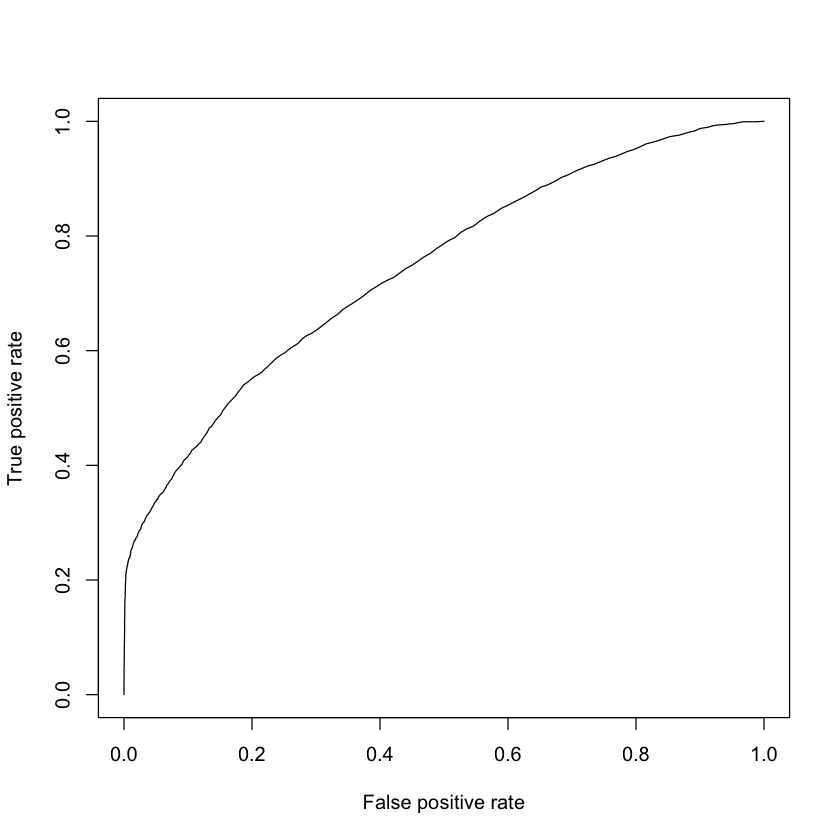

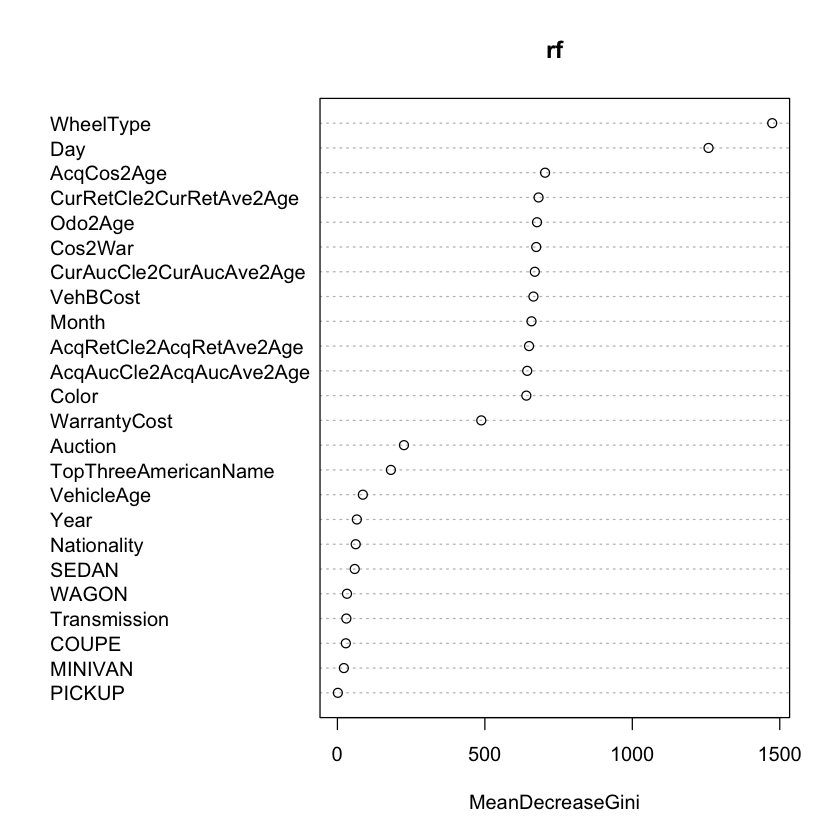

In [360]:
## Fit a RF with default parameters
rf <- randomForest(IsBadBuy ~ ., data=train_data, keep.forest = TRUE)

## Prediction 
pred <- predict(rf, test_data)
table(pred, test_data$IsBadBuy)

## Plot ROC 
pred <- predict(rf, test_data, type = 'prob')[,2]
phat <- prediction(pred, test_data$IsBadBuy)
perf <- performance(phat, "tpr", "fpr")
plot(perf) 

## The Area Under ROC Curve is 74.4%
auc <- performance(phat,"auc")
auc

## Variable importance
varImpPlot(rf,type=2)

In the following, we quickly fit a Gradient Boosted Tree (GBT) model. GBT is a cousin of RF, but requires more effort in tunning the hyper-parameters.  When it is well tunned, it could end up with better performance than RF.  The following GBT has a AUC (area under curve) of 74.6%, which is larger than that of the above RF.   

   
        0     1
  0 18708  2056
  1   137   639

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7460963


Slot "alpha.values":
list()


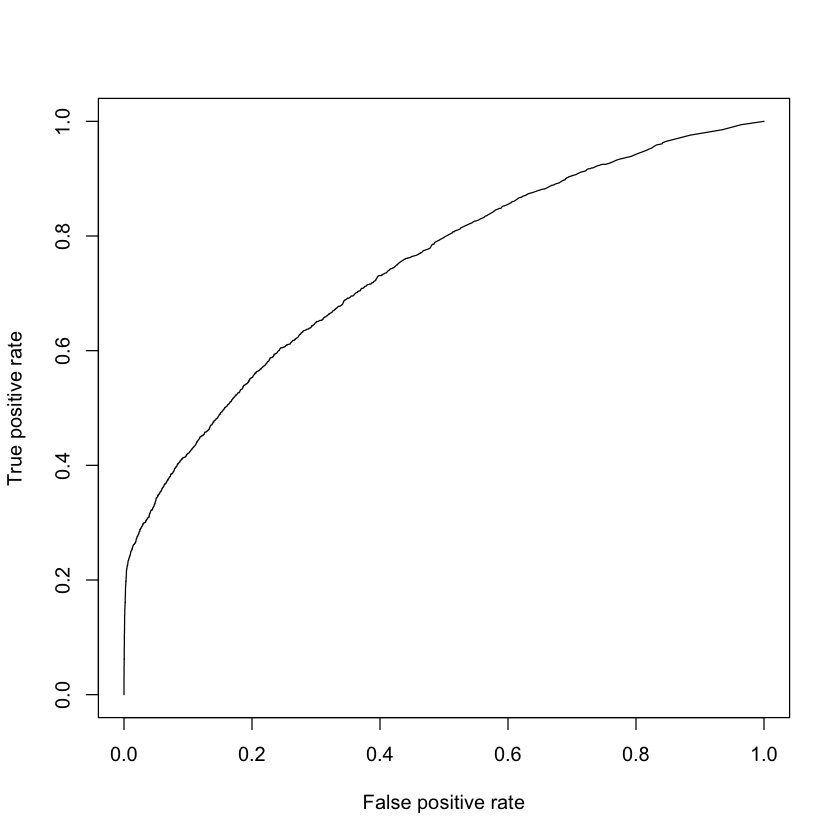

In [367]:
## Fit GBT (gradient boosting trees) 

train_data$IsBadBuy <- as.numeric(train_data$IsBadBuy) - 1
test_data$IsBadBuy <- as.numeric(test_data$IsBadBuy) - 1

gbm_fit <- gbm(IsBadBuy ~ ., data = train_data, n.trees = 100, distribution="bernoulli", 
               shrinkage=0.05, interaction.depth = 8)

phat <- predict(gbm_fit, test_data, n.trees = 100) 
table(ifelse(phat > 0, 1, 0), test_data$IsBadBuy)

phat <- prediction(yhat, test_data$IsBadBuy)
perf <- performance(phat, "tpr", "fpr")
plot(perf) 

auc <- performance(phat,"auc")
auc

## Step 4.  Plan for Additional Analyses 

Given the limited time, I did three things to demonstrate how Classification Analysis should be conducted:  (1) data exploration and pre-processing; (2) fit a logistic regression model as baseline; (3) fit a random forest model and a gradiate boosted tree. The focus was definitely on finding the best final models or making 'correct' interpretation or 'accurate' predictions.   

If I have more time, I will do the following. 

(1) Data Preprocessing 

 - Feature Engineering: recategorize the variables, add order-1/order-2 interaction terms, apply other transformation or using spline methods.    
 - Handling Missing Values via imputation-based strategies, e.g., using model-based Multiple Imputation.
 - Improve domain knowldge regarding car auction business and know more details of the auction procedure. 

(2) Improve the Logistic Regression Model

 - After carefully adding more features, I will apply GLM with L1 regularizations to find a model with better interpretations. 
 - For the purpose of making prediction, L2 regularization will be applied. 

(3) Other Advanced Modeling Approach

 - Definitely will consider fitting the following models: SVM (support vector machine) with kernal methods (mapping data to higher dimensions where linear patterns exibit), ANN (multilayer neural networks). 
 
 - Using these models to have deeper understanding of each predictors' importance and inflence to the outcome variable, e.g., using partial plot from Random Forest to see marginal relationship between each predictor and IsBadBuy.  

(4) Fit a Decision Tree for Goal B

- DT is one of the most useful Machine Learning method across many methods because of the advantages in handling mixed type data (continuous and categorical), missing values, outliers, and nonlinear relationship.  It has great prediction power with very intuitive interpretation.     

- I may consider how to construct a set of final Decision Trees for various purposes. For example, for different car models and different auction type, we may fit different trees to use.